# ARIMA

Bayangkan Anda adalah pemilik toko yang menjual barang-barang elektronik. Anda ingin mengetahui berapa banyak produk tertentu yang harus dibeli untuk bulan depan agar tidak kehabisan stok. Penjualan produk Anda tidak memiliki pola musiman yang jelas, tetapi menunjukkan tren pertumbuhan yang stabil dari bulan ke bulan. Di sinilah metode ARIMA dapat membantu!

ARIMA adalah singkatan dari AutoRegressive Integrated Moving Average. Ini adalah metode statistik yang digunakan untuk memprediksi nilai di masa depan berdasarkan data historis yang sudah ada. ARIMA sangat berguna untuk menganalisis data deret waktu yang memiliki sifat stasioner atau yang dapat dijadikan stasioner melalui teknik differencing.

## Fungsi ARIMA
Pikirkan ARIMA sebagai alat yang membantu Anda memperkirakan berapa banyak barang yang harus Anda pesan berdasarkan data penjualan di masa lalu. Berikut adalah langkah-langkah bagaimana ARIMA bekerja:
1. Mempelajari Data Sebelumnya: ARIMA menganalisis data penjualan dari bulan-bulan sebelumnya untuk menemukan pola dan hubungan. Misalnya, meskipun penjualan tidak menunjukkan fluktuasi musiman yang jelas, Anda mungkin melihat bahwa penjualan terus meningkat seiring waktu.
2. Menghilangkan Tren: Untuk menggunakan ARIMA, pertama-tama kita perlu memastikan data bersifat stasioner. Jika data penjualan Anda menunjukkan tren yang jelas (misalnya, penjualan yang meningkat setiap bulan), ARIMA akan membantu menghilangkan tren ini dengan menggunakan teknik differencing untuk membuat data lebih stabil.
3. Membuat Prediksi: Setelah mempelajari data dan memastikan data stasioner, ARIMA akan menghasilkan prediksi untuk bulan-bulan mendatang. Misalnya, berdasarkan data penjualan sebelumnya, ARIMA mungkin memperkirakan bahwa pada bulan Januari, Anda akan menjual 300 unit produk tertentu.
4. Mengukur Ketepatan: Setelah prediksi dilakukan, Anda bisa membandingkan hasil prediksi dengan data penjualan aktual untuk menilai seberapa akurat prediksi tersebut. Jika hasilnya mendekati data aktual, itu menunjukkan bahwa ARIMA bekerja dengan baik dalam memprediksi penjualan.


In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Penggunaan Data

In [2]:
try:
    df = pd.read_csv("Superstore.csv", sep=",") 
    sales_data = df[['Order Date', 'Sales']] 
    sales_data = pd.DataFrame(sales_data) 
    sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date']) 
    display(sales_data)
    print(sales_data.head(10))
except FileNotFoundError:
    print("Tidak dapat membaca")

,Order Date,Sales
0,2016-11-08,261.9600
1,NaT,NaN
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,NaT,NaN


  Order Date     Sales
0 2016-11-08  261.9600
1        NaT       NaN
2 2016-06-12   14.6200
3 2015-10-11  957.5775
4 2015-10-11   22.3680
5        NaT       NaN
6 2014-06-09    7.2800
7 2014-06-09  907.1520
8 2014-06-09   18.5040
9 2014-06-09  114.9000


In [3]:
# kita ambil "Order Date" untuk dijadikan sebagai index
df1 = sales_data.set_index('Order Date') 

# coba ambil data bulanan menjadi sample dan kemudian kita hitung rata-rata setiap bulan
monthly_sales = df1.resample('M').mean() 
monthly_sales.head()

,Sales
Order Date,
2014-01-31,224.101296
2014-02-28,115.036545
2014-03-31,413.836966
2014-04-30,220.961692
2014-05-31,206.656020


# 2. Visualisasikan Data Bulanan Tersebut

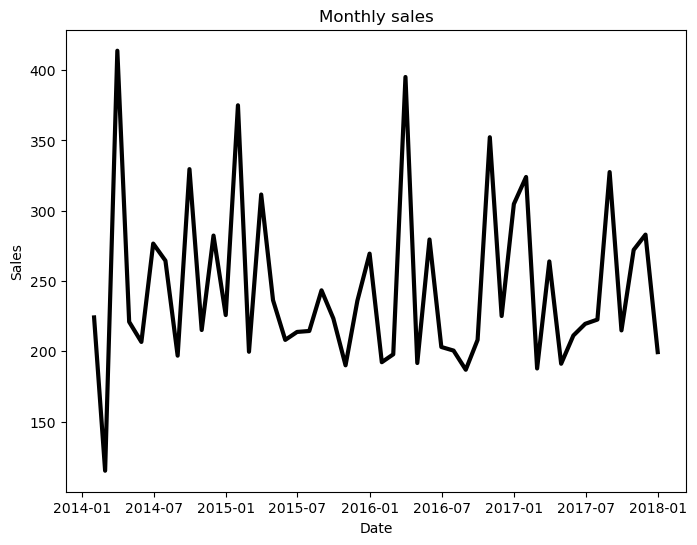

In [4]:
plt.figure(figsize=(8, 6)) 
plt.plot(monthly_sales['Sales'], linewidth=3, c='black') 
plt.title("Monthly sales") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.show()

# 3. Lakukan Uji Statistioner

Langkah ini untuk menguji apakah data sudah statistik atau belum:
- Kalau datanya stasioner, artinya polanya tidak berubah terlalu banyak dari waktu ke waktu. Misalnya, penjualan naik atau turun tetapi rata-rata dan bentuk grafiknya tetap sama sepanjang waktu.
- Kalau datanya tidak stasioner, maka grafiknya bisa naik terus, turun terus, atau punya pola yang berubah-ubah, misalnya lebih tinggi di bulan tertentu dan lebih rendah di bulan lainnya.

Cara uji statistioner dapat dilakukan secara langsung dengan melihat grafiknya, tetapi ada juga penggunaan rumus untuk melihat apakah data sudah statistioner atau belum yaitu menggunakan teknik Augmented Dickey-Fuller (ADF).

### Hasil Uji:

Hasil uji menggunakan metode ADF sama seperti uji statistik, semakin ADF statictik jauh dari 0 maka data tersebut semakin stabil.

Hasil uji tersebut terbagi menjadi:
- jika p-value < 0,05 => data hasil uji stabil (Stationary)
- jika p-value > 0,05 => data hasil uji tidak stabil (Non Stationeary)

Selain itu, melihat dari data "Staionary" juga lebih baik. Nilai hasil "Stationary" harus lebih kecil dari nilai ADF, semakin kecil, menunjukkan data statisioner

In [5]:
def check_stationarity(timeseries): 
    result = adfuller(timeseries, autolag='AIC') 
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}') 
    print(f'p-value: {p_value}') 
    print(f'Statisioner: {result[4]}')
    if p_value < 0.05:
        Stasioner = 'stasioner'
    else:
        Stasioner = 'Non-stasioner'
    print(f'Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah {Stasioner}' )
    

check_stationarity(monthly_sales['Sales'])

ADF Statistic: -9.758383322175126
p-value: 7.679736470949318e-17
Statisioner: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
Disimpulkan berdasarkan analsisi ADF, P-Value, dan statisioner maka, hasilnya adalah stasioner


# 4. Tentukan Parameter ARIMA

## Pada ARIMA, kita mengenal:
### p 
- p menunjukkan model akan "menggunakan berapa data bulan ke belakang untuk memprediksi bulan depan". Semakin besar p, semakin banyak bulan yang dilihat.

### d 
- d adalah “differencing” untuk menghilangkan tren.
- Bayangkan kamu punya data penjualan yang setiap bulan cenderung selalu naik terus menerus. d ini berfungsi untuk mengurangi atau menghilangkan tren kenaikan tersebut supaya datanya jadi lebih stabil dan tidak terlalu miring ke atas atau ke bawah.
- Cara kerja: Misalnya, kalau d=1, kita mengurangi setiap nilai dengan nilai sebelumnya. Jadi, kalau bulan ini penjualannya naik dari bulan sebelumnya, kita cuma lihat selisihnya, bukan jumlah totalnya.
- Gunanya: Untuk menghilangkan tren naik atau turun yang konsisten

### q 
- q mirip dengan p, tetapi pada q melihat kesalahan model dari bulan-bulan sebelumnya, jadi kalau ada salah di satu bulan, model bisa belajar dari kesalahan itu.

In [6]:
p, d, q = 2, 1, 1

# 5. Latih Model ARIMA

In [7]:
model = ARIMA(monthly_sales, order=(p, d, q)) 
results = model.fit()
model

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


# 6. Prediksi Periode Mendatang dengan ARIMA

In [8]:
Periode = 12 
Prediksi = results.get_forecast(steps=Periode) 
Rata_Prediksi = Prediksi.predicted_mean 
Confiden_Interval_Prediksi = Prediksi.conf_int()
print("Rata-rata Prediksi Bulanan:")
display(Rata_Prediksi)

# Menampilkan interval kepercayaan untuk setiap prediksi
print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(Confiden_Interval_Prediksi)

Rata-rata Prediksi Bulanan:


2018-01-31    260.060249
2018-02-28    241.644198
2018-03-31    245.837713
2018-04-30    245.065555
2018-05-31    245.175895
2018-06-30    245.166988
2018-07-31    245.165802
2018-08-31    245.166580
2018-09-30    245.166349
2018-10-31    245.166401
2018-11-30    245.166391
2018-12-31    245.166393
Freq: M, Name: predicted_mean, dtype: float64


Interval Kepercayaan Prediksi (Lower, Upper):


,lower Sales,upper Sales
2018-01-31,147.556455,372.564042
2018-02-28,122.922024,360.366371
2018-03-31,126.571482,365.103944
2018-04-30,125.811091,364.320019
2018-05-31,125.916670,364.435120
2018-06-30,125.908226,364.425750
2018-07-31,125.907044,364.424561
2018-08-31,125.907800,364.425361
2018-09-30,125.907573,364.425124
2018-10-31,125.907622,364.425179


## Hasil Prediksi Berdasarkan Kepercayaan Rata-Rata

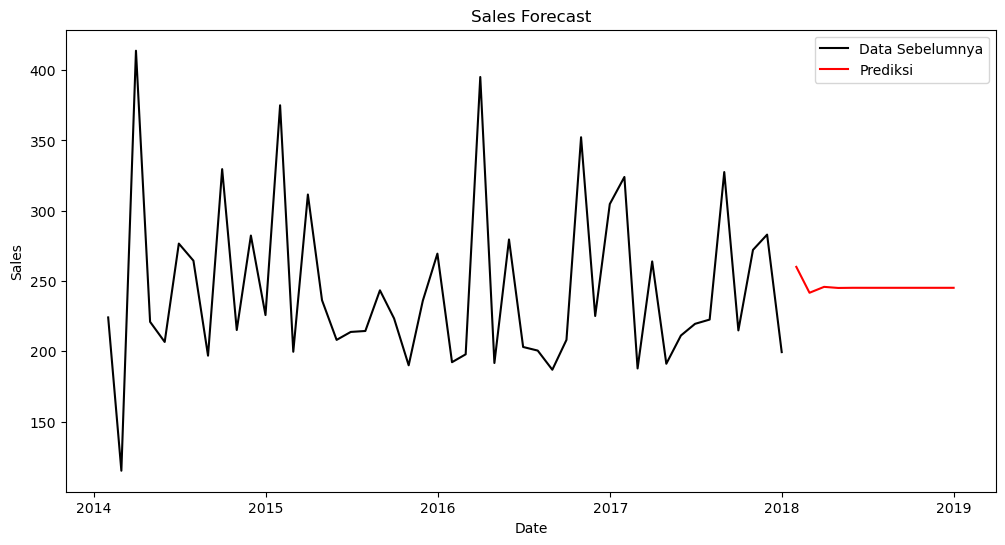

In [9]:
plt.figure(figsize=(12, 6)) 
plt.plot(monthly_sales, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

## Hasil Prediksi Berdasarkan Maximum dan Minimum Prediksi

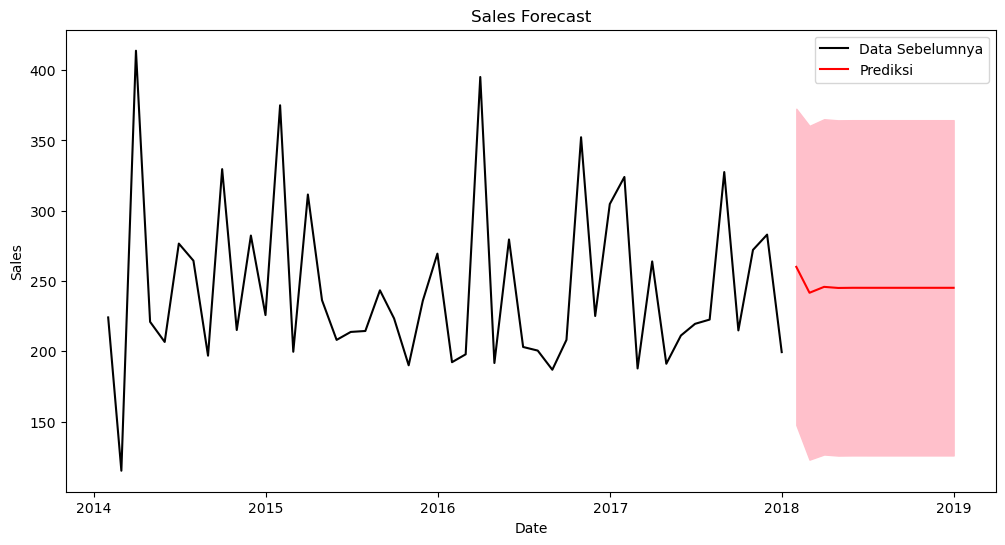

In [10]:
plt.figure(figsize=(12, 6)) 
plt.plot(monthly_sales, label='Data Sebelumnya', color='black') 
plt.plot(Rata_Prediksi, label='Prediksi', color='red') 
plt.fill_between(Confiden_Interval_Prediksi.index, Confiden_Interval_Prediksi.iloc[:, 0], Confiden_Interval_Prediksi.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()

# 7. Lakukan Uji MAE dan MSE

Kita bandingkan data prediksi kita dengan data aktual yang yang kita berikan nama "Data_sebelumnya". Uji tersebut dilakukan dengan uji MAE dan MSE:
### MAE menghitung rata-rata absolut dari error, mengukur deviasi prediksi dari nilai aktual tanpa memperhatikan arah deviasi. Uji MAE seperti:
- Menebak tinggi teman, dan setelah itu kamu melihat seberapa jauh tebakan dari tinggi sebenarnya. Semua selisih ini dihitung, lalu kita ambil rata-ratanya.

### MSE menghitung rata-rata dari error yang dikuadratkan, memperbesar error besar dan mengurangi pengaruh error kecil. Uji MSE seperti:
- Sama seperti MAE tetapi pada MSE menggunakan teknik pengkuadratan seperti (100-10)^2. Sehingga MSE memprediksi kesalahan yang lebih serius, terutama jika ada satu prediksi yang sangat salah. 



In [11]:
Data_sebelumnya = monthly_sales[-Periode:] 
print(Data_sebelumnya)
mae = mean_absolute_error(Data_sebelumnya, Rata_Prediksi) 
mse = mean_squared_error(Data_sebelumnya, Rata_Prediksi) 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

                 Sales
Order Date            
2017-01-31  324.024098
2017-02-28  187.791603
2017-03-31  263.933004
2017-04-30  191.129090
2017-05-31  211.229721
2017-06-30  219.536106
2017-07-31  222.571082
2017-08-31  327.515333
2017-09-30  214.867209
2017-10-31  272.138916
2017-11-30  283.009868
2017-12-31  199.414765
MAE: 41.26962391505776
MSE: 2041.6729656611294


# 8. Lihat Uji dengan Kondisi Asli

Pada kasus ini, gunakan data 12 tahun terakhir untuk memperdiksi kemudian kita lihat seberapa akurat prediksi tersebut dengan hasil asli.
1. train_data untuk menyimpan data yang akan kita latih
2. test_data untuk menyimpan data asli tersebut


Interval Kepercayaan Prediksi (Lower, Upper):


C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,lower Sales,upper Sales
2017-01-31,104.098382,340.449717
2017-02-28,125.050549,377.112401
2017-03-31,116.978770,370.713907
2017-04-30,118.398069,372.092176
2017-05-31,118.206170,371.915456
2017-06-30,118.207802,371.916334
2017-07-31,118.217036,371.925156
2017-08-31,118.213260,371.921594
2017-09-30,118.214285,371.922564
2017-10-31,118.214067,371.922366


2017-01-31    222.274050
2017-02-28    251.081475
2017-03-31    243.846338
2017-04-30    245.245122
2017-05-31    245.060813
2017-06-30    245.062068
2017-07-31    245.071096
2017-08-31    245.067427
2017-09-30    245.068425
2017-10-31    245.068216
2017-11-30    245.068248
2017-12-31    245.068246
Freq: M, Name: predicted_mean, dtype: float64

MAE: 45.36788392100791
MSE: 2663.28896468553


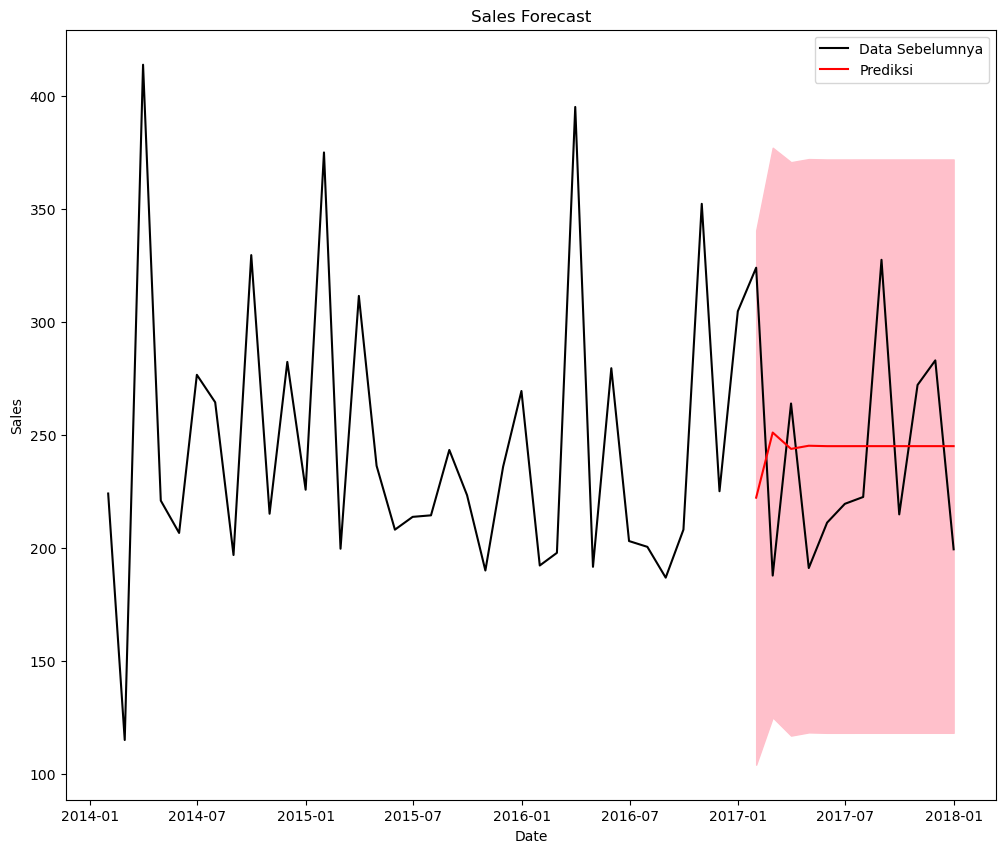

In [15]:
train_data = monthly_sales[:-12]
test_data = monthly_sales[-12:]

model = ARIMA(train_data, order=(p, d, q))
results = model.fit()

forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

print("\nInterval Kepercayaan Prediksi (Lower, Upper):")
display(confidence_interval, predicted_mean)

mae = mean_absolute_error(test_data, predicted_mean)
mse = mean_squared_error(test_data, predicted_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

plt.figure(figsize=(12, 10)) 
plt.plot(monthly_sales, label='Data Sebelumnya', color='black') 
plt.plot(predicted_mean, label='Prediksi', color='red') 
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='pink') 
plt.title("Sales Forecast") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend() 
plt.show()